In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import joblib
from lightgbm import LGBMRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/IS353.P12 - Nhóm 4/Bài tập trên lớp/Báo cáo tiến trình/Datasets/after_process_nhom4_data.csv')

In [4]:
ordinal_features = [' khoa', ' hedt', ' chuyennganh2']

df[ordinal_features] = df[ordinal_features].fillna('Unknown')

encoder = OrdinalEncoder()
df_encoded = encoder.fit_transform(df[ordinal_features])

df_encoded = pd.DataFrame(df_encoded, columns=[f"{col}_mahoa" for col in ordinal_features], index=df.index)

df = pd.concat([df, df_encoded], axis=1)

df.drop(columns=ordinal_features, inplace=True)


print(df.head())

                                       mssv  hocky  namhoc  dtbhk  sotchk  \
0  0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6    2.0  2021.0   8.28    21.0   
1  0000AC05XPvAibaEXe9B2tolTZ0JLoBGbkQixQS6    1.0  2022.0   7.56    16.0   
2  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    2.0  2019.0   9.00    21.0   
3  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    1.0  2020.0   9.11    15.0   
4  0001EB57XPvAibaEXe/twT+sf632fUXnsgPGeB4G    2.0  2020.0   8.75    19.0   

        id   namsinh   gioitinh     noisinh      lopsh   khoahoc   tinhtrang  \
0      NaN       NaN        NaN         NaN        NaN       NaN         NaN   
1      NaN       NaN        NaN         NaN        NaN       NaN         NaN   
2  18570.0    2001.0        0.0   'Nghệ An'   TMĐT2019      14.0         1.0   
3  18570.0    2001.0        0.0   'Nghệ An'   TMĐT2019      14.0         1.0   
4  18570.0    2001.0        0.0   'Nghệ An'   TMĐT2019      14.0         1.0   

     diachi_tinhtp Column1  nhom  dtbhk2   khoa_mahoa   

In [5]:
# Xử lý NaN
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# Chọn biến đầu vào và đầu ra
X = df.drop(columns=['nhom', 'dtbhk', 'id', ' namsinh', 'mssv', ' noisinh', ' diachi_tinhtp', 'Column1', ' lopsh'], errors='ignore')  # Xóa cột không cần thiết
y = df['dtbhk']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Khởi tạo mô hình LightGBM
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 52911, number of used features: 10
[LightGBM] [Info] Start training from score 6.801415


LGBMRegressor(random_state=42)

In [8]:
# tập Test
y_pred = lgbm_model.predict(X_test)

# Đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.8122981521117019
Mean Squared Error (MSE): 1.4095839845268379
Root Mean Squared Error (RMSE): 1.1872590216658023
R^2 Score: 0.6206214554237506


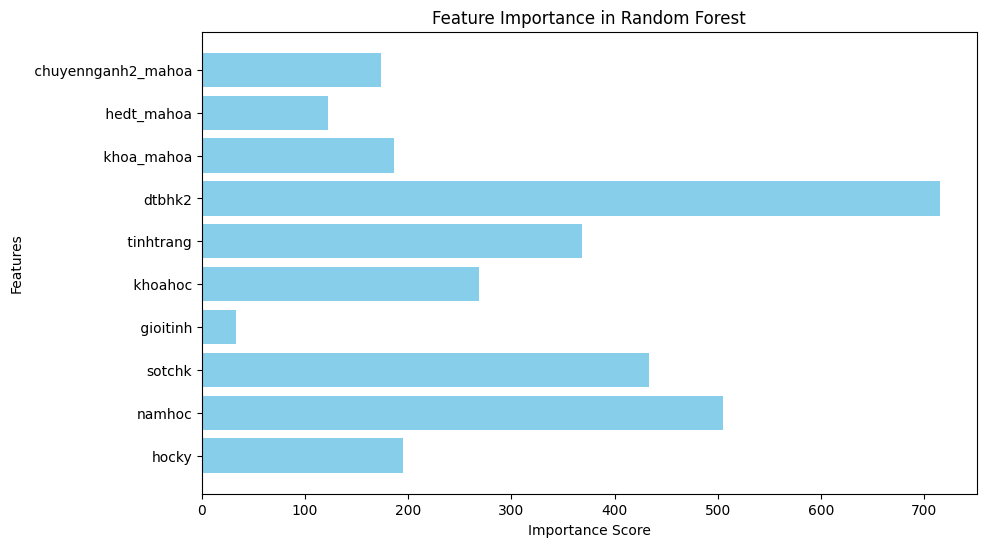

In [9]:
feature_importances = lgbm_model.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in LightGBM")
plt.show()

In [10]:
test_row = pd.DataFrame({
    'hocky': [2.0],
    'namhoc': [2021.0],
    'sotchk': [21.0],
    ' gioitinh': [1.0],
    ' khoahoc': [11.0],
    ' tinhtrang': [1.0],
    'dtbhk2': [5],
    ' khoa_mahoa': [2.0],
    ' hedt_mahoa': [1.0],
    ' chuyennganh2_mahoa': [4.0]
})

In [11]:
predicted_dtb = lgbm_model.predict(test_row)
print(f"Dự đoán DTBHK: {predicted_dtb[0]:.2f}")

Dự đoán DTBHK: 5.59


In [12]:
joblib.dump(lgbm_model, 'light_gbm_dtbhk_model.pkl')
# rf_model = joblib.load('random_forest_dtbhk_model.pkl')

['light_gbm_dtbhk_model.pkl']